<a href="https://www.kaggle.com/code/melihanlerolu/network-buffer-analys-s?scriptVersionId=107428104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import geopandas as gpd # Data processing,reading from CSV file
import pandas as pd # Data processing
import matplotlib.pyplot as plt # Ploting
import contextily as ctx

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# Reading data from shapefile 
road_line = gpd.read_file("../input/datasetss/edge.shp")
poi=gpd.read_file("../input/datasetss/Binapoi.shp") 
node_qgıs_a= gpd.read_file("../input/datasetss/node.shp") 

In [3]:
# Check the coordinate reference system after Reproject the data
road_line.to_crs(epsg=5254,inplace=True)
node_qgıs_a.to_crs(epsg=4326,inplace=True)

In [4]:
node_qgıs_a.head(2)

,OBJECTID,YOL_ISMI,YOL_ID,YOL_TURU,YOL_TIPI,SERIT_SAYI,BOLUNMUS_Y,HIZ,DAKIKA,YAYAHIZ,...,MAKS_YOLKN,SHAPE_Leng,vertex_ind,vertex_par,vertex_p_1,distance,angle,Y,X,geometry
0,1.0,İnan Sk.,1108026.0,3.0,2.0,1ç,2.0,25.0,0.35282,6.0,...,96580592.0,61.638422,0,0,0,0.000000,175.184939,385252,4538065,POINT (28.63680 40.96935)
1,1.0,İnan Sk.,1108026.0,3.0,2.0,1ç,2.0,25.0,0.35282,6.0,...,96580592.0,61.638422,1,0,1,11.622618,166.577425,385253,4538053,POINT (28.63681 40.96925)


In [5]:
node_qgıs_a['lon'] = node_qgıs_a.geometry.x 
node_qgıs_a['lat'] = node_qgıs_a.geometry.y

Since the lat and lon values are needed in the future, I wanted to add the data without editing it.

In [6]:
#design column
node_qgıs_a= node_qgıs_a[["OBJECTID","SHAPE_Leng","YOL_ISMI","YOL_ID","distance","geometry","lon","lat"]]
road_line =road_line[["OBJECTID","YOL_ISMI","YOL_ID","HIZ","SHAPE_Leng","geometry"]]
node_qgıs=node_qgıs_a.to_crs(epsg=5254)


<AxesSubplot:>

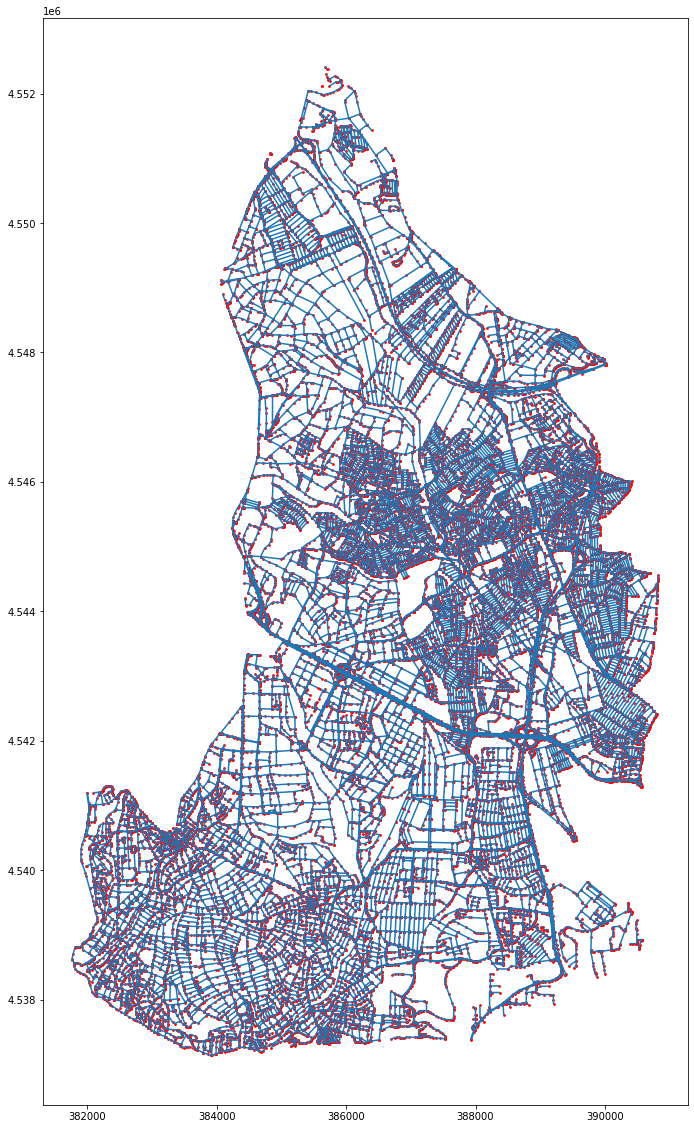

In [7]:
#Plotting Data 
fig, ax = plt.subplots(figsize=(30,20))
road_line.plot(ax=ax)
node_qgıs.plot(ax=ax,facecolor="red",markersize=3) 


In [8]:
road_line["HIZ"] = road_line["HIZ"].fillna(0) # Set the NaN values in the speed column to 0


In [9]:
line_buffer=road_line[road_line["HIZ"]==0] #Define a new geodataframe whose values are

In [10]:
line_buffer.head(2)

,OBJECTID,YOL_ISMI,YOL_ID,HIZ,SHAPE_Leng,geometry
13,14.0,Bayır Sk.,1062658.0,0.0,68.060487,"LINESTRING (383283.358 4538234.728, 383351.240..."
15,16.0,Akçaburgaz Cad.,1081688.0,0.0,41.158225,"LINESTRING (384629.870 4550457.236, 384637.607..."


In [11]:
edge = road_line[road_line["HIZ"] > 0] #Define a new geodataframe whose values are

In [12]:
edge.head(2)

,OBJECTID,YOL_ISMI,YOL_ID,HIZ,SHAPE_Leng,geometry
0,1.0,İnan Sk.,1108026.0,25.0,61.638422,"LINESTRING (385251.902 4538064.945, 385252.877..."
1,2.0,None,NaN,25.0,104.640475,"LINESTRING (384770.975 4539903.500, 384815.015..."


In [13]:
buffer= line_buffer.buffer(distance = 400) 

You can change the distance of 400 m according to the size of your work area.

In [14]:
buffer.head(2) # Dtype Geoseries 

13    POLYGON ((383380.206 4538628.749, 383419.171 4...
15    POLYGON ((385030.476 4550492.008, 385035.954 4...
dtype: geometry

Text(0.5, 1.0, 'Beylikdüzü Road Buffer Analysıs')

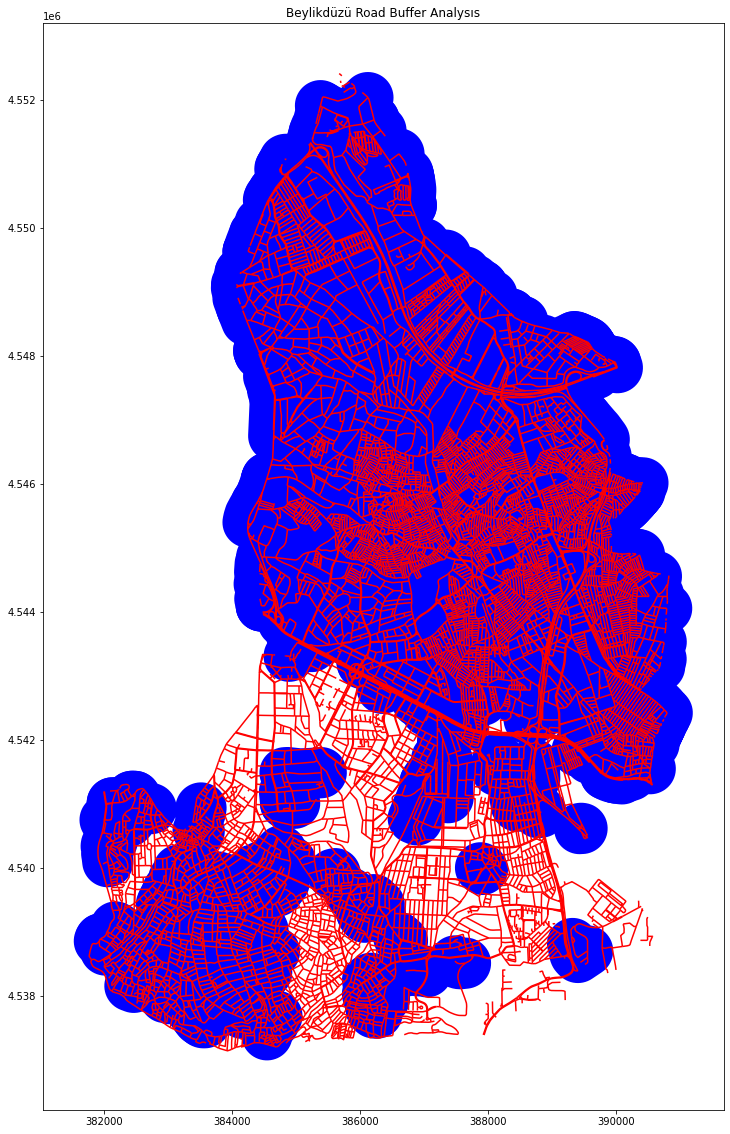

In [15]:
# Plotting Buffer 
fig, ax = plt.subplots(figsize=(30,20))
buffer.plot(ax=ax,color="blue")
road_line.plot(ax=ax, color='red')
ax.set_title("Beylikdüzü Road Buffer Analysıs")



****You can see the buffers applied to the roads without speed information.****

In [16]:
line_buf=gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffer)) #Geoseries conver to GeoDataFrame

In [17]:
line_buf.head(2)

,geometry
13,"POLYGON ((383380.206 4538628.749, 383419.171 4..."
15,"POLYGON ((385030.476 4550492.008, 385035.954 4..."


In [18]:
line_buf['FID'] = line_buf.reset_index().index #A common column is needed to determine intersection areas.

In [19]:
line_buf.head(2)

,geometry,FID
13,"POLYGON ((383380.206 4538628.749, 383419.171 4...",0
15,"POLYGON ((385030.476 4550492.008, 385035.954 4...",1


In [20]:
intersect =edge.overlay(line_buf,how='intersection')#intersection of roads without speed and roads with speed

In [21]:
intersect.head(2)

,OBJECTID,YOL_ISMI,YOL_ID,HIZ,SHAPE_Leng,FID,geometry
0,2.0,None,NaN,25.0,104.640475,994,"LINESTRING (384770.975 4539903.500, 384815.015..."
1,93.0,Ferda Sk.,1064029.0,30.0,149.512398,994,"LINESTRING (384532.453 4539648.529, 384618.201..."


In [22]:
velocity_road = intersect.groupby('FID').mean().reset_index()

Since the intersection areas are listed in the FID, the average of the values should be taken. Since all values are averaged, we only need ****SPEED**** value. 

In [23]:
velocity_road.head(2)

,FID,OBJECTID,YOL_ID,HIZ,SHAPE_Leng
0,0,8592.182692,1.062379e+06,29.423077,85.372394
1,1,9113.833333,1.034315e+06,44.444444,108.991136


In [24]:
 line_buffer.head(2)

,OBJECTID,YOL_ISMI,YOL_ID,HIZ,SHAPE_Leng,geometry
13,14.0,Bayır Sk.,1062658.0,0.0,68.060487,"LINESTRING (383283.358 4538234.728, 383351.240..."
15,16.0,Akçaburgaz Cad.,1081688.0,0.0,41.158225,"LINESTRING (384629.870 4550457.236, 384637.607..."


In [25]:
line_buffer_b= line_buffer.reset_index()

In [26]:
line =line_buffer_b.reset_index()

In [27]:
line.head(2)

,level_0,index,OBJECTID,YOL_ISMI,YOL_ID,HIZ,SHAPE_Leng,geometry
0,0,13,14.0,Bayır Sk.,1062658.0,0.0,68.060487,"LINESTRING (383283.358 4538234.728, 383351.240..."
1,1,15,16.0,Akçaburgaz Cad.,1081688.0,0.0,41.158225,"LINESTRING (384629.870 4550457.236, 384637.607..."


In [28]:
line.rename(columns={'level_0': 'FID'}, inplace=True)#rename columns

Common column required for geodataframe join

In [29]:
velocity_road_2=velocity_road .rename(columns={'index': 'FID'})

In [30]:
velocity_road_2.head(2)

,FID,OBJECTID,YOL_ID,HIZ,SHAPE_Leng
0,0,8592.182692,1.062379e+06,29.423077,85.372394
1,1,9113.833333,1.034315e+06,44.444444,108.991136


In [31]:
line.head(2)

,FID,index,OBJECTID,YOL_ISMI,YOL_ID,HIZ,SHAPE_Leng,geometry
0,0,13,14.0,Bayır Sk.,1062658.0,0.0,68.060487,"LINESTRING (383283.358 4538234.728, 383351.240..."
1,1,15,16.0,Akçaburgaz Cad.,1081688.0,0.0,41.158225,"LINESTRING (384629.870 4550457.236, 384637.607..."


In [32]:
road_velo = line.merge(velocity_road, on='FID') #Merge GeoDataFrame

In [33]:
road_velo.head(2)

,FID,index,OBJECTID_x,YOL_ISMI,YOL_ID_x,HIZ_x,SHAPE_Leng_x,geometry,OBJECTID_y,YOL_ID_y,HIZ_y,SHAPE_Leng_y
0,0,13,14.0,Bayır Sk.,1062658.0,0.0,68.060487,"LINESTRING (383283.358 4538234.728, 383351.240...",8592.182692,1.062379e+06,29.423077,85.372394
1,1,15,16.0,Akçaburgaz Cad.,1081688.0,0.0,41.158225,"LINESTRING (384629.870 4550457.236, 384637.607...",9113.833333,1.034315e+06,44.444444,108.991136


In [34]:
road_velo_append= road_velo [['FID','index',"OBJECTID_x","SHAPE_Leng_x","YOL_ISMI","YOL_ID_x","HIZ_y","geometry"]]

We get the columns we need

In [35]:
road_velo_append.head(2)

,FID,index,OBJECTID_x,SHAPE_Leng_x,YOL_ISMI,YOL_ID_x,HIZ_y,geometry
0,0,13,14.0,68.060487,Bayır Sk.,1062658.0,29.423077,"LINESTRING (383283.358 4538234.728, 383351.240..."
1,1,15,16.0,41.158225,Akçaburgaz Cad.,1081688.0,44.444444,"LINESTRING (384629.870 4550457.236, 384637.607..."


In [36]:
road_velo_append.rename(columns = {'OBJECTID_x':'OBJECTID', 'SHAPE_Leng_x':'SHAPE_Leng',"YOL_ID_x":"YOL_ID","HIZ_y":"HIZ"}, inplace = True)#rename columns

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
road_velo_append.head(2)

,FID,index,OBJECTID,SHAPE_Leng,YOL_ISMI,YOL_ID,HIZ,geometry
0,0,13,14.0,68.060487,Bayır Sk.,1062658.0,29.423077,"LINESTRING (383283.358 4538234.728, 383351.240..."
1,1,15,16.0,41.158225,Akçaburgaz Cad.,1081688.0,44.444444,"LINESTRING (384629.870 4550457.236, 384637.607..."


In [38]:
line_velo=road_velo_append.set_index("index")

In [39]:
edge.head(2)

,OBJECTID,YOL_ISMI,YOL_ID,HIZ,SHAPE_Leng,geometry
0,1.0,İnan Sk.,1108026.0,25.0,61.638422,"LINESTRING (385251.902 4538064.945, 385252.877..."
1,2.0,None,NaN,25.0,104.640475,"LINESTRING (384770.975 4539903.500, 384815.015..."


In [40]:
data_road_velocity = edge.append(line_velo, ignore_index=True)

  We add the paths where we find their speed

In [41]:
data_road_velocity

,OBJECTID,YOL_ISMI,YOL_ID,HIZ,SHAPE_Leng,geometry,FID
0,1.0,İnan Sk.,1108026.0,25.000000,61.638422,"LINESTRING (385251.902 4538064.945, 385252.877...",NaN
1,2.0,None,NaN,25.000000,104.640475,"LINESTRING (384770.975 4539903.500, 384815.015...",NaN
2,3.0,Demokrasi Cad.,1107862.0,25.000000,21.542664,"LINESTRING (385194.150 4538949.817, 385214.399...",NaN
3,4.0,İlkbahar Sk.,1022037.0,25.000000,17.395574,"LINESTRING (388455.368 4539018.797, 388463.467...",NaN
4,5.0,Peyami Safa Sk.,1072510.0,25.000000,56.739416,"LINESTRING (386439.773 4542055.778, 386496.266...",NaN
...,...,...,...,...,...,...,...
17730,17730.0,Brilik Sanayi Sitesi 6. Cad.,NaN,32.027027,147.754368,"LINESTRING (387015.508 4541327.736, 387015.612...",3500.0
17731,17731.0,Brilik Sanayi Sitesi 1. Cad.,NaN,30.677966,164.106912,"LINESTRING (387370.899 4541490.069, 387372.469...",3501.0
17732,17732.0,Brilik Sanayi Sitesi 2. Cad.,NaN,30.563380,163.723338,"LINESTRING (387288.064 4541654.954, 387285.709...",3502.0
17733,17733.0,Brilik Sanayi Sitesi 3. Cad.,NaN,30.675676,177.061161,"LINESTRING (387196.985 4541150.488, 387198.555...",3503.0


In [42]:
data_road_velocity.iloc[10:15] # Latest version of our file

,OBJECTID,YOL_ISMI,YOL_ID,HIZ,SHAPE_Leng,geometry,FID
10,11.0,Demokrasi Cad.,1107862.0,25.0,74.934278,"LINESTRING (385633.905 4538457.538, 385647.380...",NaN
11,12.0,None,NaN,25.0,151.807141,"LINESTRING (386193.563 4542131.795, 386198.987...",NaN
12,13.0,Samet Sk.,11458255.0,25.0,21.149455,"LINESTRING (385513.588 4538898.755, 385528.146...",NaN
13,15.0,Onur Güvener Cad.,1020966.0,40.0,35.984277,"LINESTRING (389301.421 4548132.121, 389330.432...",NaN
14,17.0,Vedat Altun Sk.,1020643.0,25.0,83.517379,"LINESTRING (388527.653 4548326.683, 388585.386...",NaN


In [43]:
 road_line.iloc[10:15] 

,OBJECTID,YOL_ISMI,YOL_ID,HIZ,SHAPE_Leng,geometry
10,11.0,Demokrasi Cad.,1107862.0,25.0,74.934278,"LINESTRING (385633.905 4538457.538, 385647.380..."
11,12.0,None,NaN,25.0,151.807141,"LINESTRING (386193.563 4542131.795, 386198.987..."
12,13.0,Samet Sk.,11458255.0,25.0,21.149455,"LINESTRING (385513.588 4538898.755, 385528.146..."
13,14.0,Bayır Sk.,1062658.0,0.0,68.060487,"LINESTRING (383283.358 4538234.728, 383351.240..."
14,15.0,Onur Güvener Cad.,1020966.0,40.0,35.984277,"LINESTRING (389301.421 4548132.121, 389330.432..."


When **data_road_velocity** and **road_line** geoDataFrames are connected, it is seen that the speed of the road in line 13 is found.
 **Good work !**

In [44]:
data_road_velocity.to_file("road_HIZ.shp")